In [1]:
import pandas as pd
pd.set_option("display.max_columns",None)
import seaborn as sns

In [2]:
data=pd.read_table(r"D:\Imarticus Presentation\XYZCorp_LendingData.txt")
data.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
data.shape

(855969, 73)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [5]:
# check the null values
for i in data.columns:
    if data[i].isnull().any()==True:
        print(data[i].isnull().sum(),"==",i)


49443 == emp_title
43061 == emp_length
734157 == desc
33 == title
439812 == mths_since_last_delinq
724785 == mths_since_last_record
446 == revol_util
8862 == last_pymnt_d
252971 == next_pymnt_d
50 == last_credit_pull_d
56 == collections_12_mths_ex_med
642830 == mths_since_last_major_derog
855527 == annual_inc_joint
855529 == dti_joint
855527 == verification_status_joint
67313 == tot_coll_amt
67313 == tot_cur_bal
842681 == open_acc_6m
842681 == open_il_6m
842681 == open_il_12m
842681 == open_il_24m
843035 == mths_since_rcnt_il
842681 == total_bal_il
844360 == il_util
842681 == open_rv_12m
842681 == open_rv_24m
842681 == max_bal_bc
842681 == all_util
67313 == total_rev_hi_lim
842681 == inq_fi
842681 == total_cu_tl
842681 == inq_last_12m


In [6]:
#drop the column wich has 50% is NA

for y in data.columns:
    if data[y].isnull().sum() >= len(data)/2:
        data.drop(y,axis=1,inplace=True)
#          print(y)


In [7]:
# again check the null values
for i in data.columns:
    if data[i].isnull().any()==True:
        print(data[i].isnull().sum(),"==",i)


49443 == emp_title
43061 == emp_length
33 == title
446 == revol_util
8862 == last_pymnt_d
252971 == next_pymnt_d
50 == last_credit_pull_d
56 == collections_12_mths_ex_med
67313 == tot_coll_amt
67313 == tot_cur_bal
67313 == total_rev_hi_lim


In [8]:
#emp_length == 43061
data.emp_length.value_counts(dropna=False)

emp_len = {'< 1 year' : 0 , '1 year' : 1, '2 years' : 2, '3 years' : 3, '4 years' : 4, 
           '5 years' : 5,'6 years' : 6,
          '7 years' : 7, '8 years' : 8, '9 years' : 9, '10+ years' : 10}
emp_len

data['emp_length'] = data['emp_length'].map(emp_len)
data['emp_length'].value_counts(dropna=False)
data['emp_length'].mode()
data["emp_length"].fillna(data["emp_length"].mode()[0],inplace=True)


In [9]:
# change values from term column
data["term"].value_counts()
data['term'] = data['term'].map({' 36 months' : 0, ' 60 months' : 1})
data['term'].value_counts() 


0    600221
1    255748
Name: term, dtype: int64

In [10]:
# again check the null values
for i in data.columns:
    if data[i].isnull().any()==True:
        print(data[i].isnull().sum(),"==",i)


49443 == emp_title
33 == title
446 == revol_util
8862 == last_pymnt_d
252971 == next_pymnt_d
50 == last_credit_pull_d
56 == collections_12_mths_ex_med
67313 == tot_coll_amt
67313 == tot_cur_bal
67313 == total_rev_hi_lim


In [11]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
#data = data.set_index(data['issue_d'])
#data = data.sort_index()
#data.drop("issue_d",axis=1,inplace=True)
#data.shape


In [12]:
# domain knowladge remove col which is not importnt
data_remov=["id","member_id","pymnt_plan","title","zip_code",
            "earliest_cr_line","last_credit_pull_d","next_pymnt_d","last_pymnt_d"]
    
data.drop(data_remov,axis=1,inplace=True)


In [13]:
data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     49443
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                 

In [14]:
data.index

RangeIndex(start=0, stop=855969, step=1)

In [15]:
# fill the null values
for i in data.columns:
    if data[i].dtype=='object' or data[i].dtype=="bool":
        data[i].fillna(data[i].mode()[0],inplace=True)
    elif data[i].dtype=="int" or data[i].dtype=="float":
        data[i].fillna(round(data[i].mean()),inplace=True)



In [16]:
data.isnull().sum()


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   855969 non-null  float64       
 1   funded_amnt                 855969 non-null  float64       
 2   funded_amnt_inv             855969 non-null  float64       
 3   term                        855969 non-null  int64         
 4   int_rate                    855969 non-null  float64       
 5   installment                 855969 non-null  float64       
 6   grade                       855969 non-null  object        
 7   sub_grade                   855969 non-null  object        
 8   emp_title                   855969 non-null  object        
 9   emp_length                  855969 non-null  float64       
 10  home_ownership              855969 non-null  object        
 11  annual_inc                  855969 non-

In [18]:
# divide data in train and test
# splite the data
train_df = data[(data['issue_d'] >= '2007-06-01') & (data['issue_d'] <= '2015-05-01')]
test_df  = data[(data['issue_d'] >= '2015-06-01') & (data['issue_d'] <= '2015-12-01')]

In [19]:
print('Train Dataset:',train_df.shape)
print('Test Dataset:',test_df.shape)

Train Dataset: (598978, 43)
Test Dataset: (256991, 43)


In [20]:
test_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
452272,25000.0,25000.0,25000.0,0,5.32,752.87,A,A1,Director,1.0,MORTGAGE,150000.0,Not Verified,2015-12-01,credit_card,VT,9.54,0.0,0.0,7.0,0.0,19339.0,42.5,18.0,w,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,701.14,0.0,1.0,INDIVIDUAL,0.0,0.0,430856.0,45500.0,0
452273,18000.0,18000.0,18000.0,1,19.48,471.70,E,E2,Software Manager,7.0,RENT,150000.0,Not Verified,2015-12-01,debt_consolidation,CA,9.39,0.0,1.0,18.0,1.0,14052.0,40.7,27.0,w,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,335.34,0.0,1.0,INDIVIDUAL,0.0,60.0,36247.0,34500.0,0
452274,7000.0,7000.0,7000.0,0,7.49,217.72,A,A4,Carrier,10.0,MORTGAGE,59000.0,Not Verified,2015-12-01,credit_card,MD,13.06,1.0,1.0,10.0,0.0,10467.0,24.2,34.0,w,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,1.0,INDIVIDUAL,0.0,0.0,55222.0,43200.0,0
452275,20000.0,20000.0,20000.0,0,17.97,722.75,D,D4,Nurse Manager,7.0,MORTGAGE,180000.0,Not Verified,2015-12-01,debt_consolidation,TX,25.10,0.0,0.0,13.0,0.0,59126.0,92.1,30.0,w,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,1.0,INDIVIDUAL,0.0,418.0,277227.0,64200.0,0
452276,15000.0,15000.0,15000.0,0,6.99,463.09,A,A3,Purchasing Manager,2.0,MORTGAGE,93000.0,Not Verified,2015-12-01,credit_card,MA,14.86,0.0,1.0,8.0,0.0,14914.0,43.2,17.0,w,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,1.0,INDIVIDUAL,0.0,0.0,306430.0,34500.0,0


In [21]:

X_train = train_df.iloc[:,:-1]
Y_train = train_df.iloc[:,-1]
Y_train = Y_train.astype('int')

X_test = test_df.iloc[:,:-1]
Y_test = test_df.iloc[:,-1]
Y_test = Y_test.astype('int')


In [22]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)



(598978, 42)
(598978,)
(256991, 42)
(256991,)


In [23]:
# For preprocessing the data

colname_cat=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname_cat.append(x)
print(colname_cat)

colname_cat1=[]
for x in X_train.columns:
    if X_train[x].dtype=='object':
        colname_cat1.append(x)
print(colname_cat1)

colname_cat2=[]
for x in X_test.columns:
    if X_test[x].dtype=='object':
        colname_cat2.append(x)
print(colname_cat2)


['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']
['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']
['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']


In [24]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname_cat:
    X_train[x]=le.fit_transform(X_train[x])
    X_test[x]=le.fit_transform(X_test[x])


In [25]:
data_corr=X_train.corr(method="pearson")
data_corr

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.998927,0.996507,0.412943,0.151503,0.946536,0.157156,0.163665,-0.042624,0.091104,-0.203954,0.369446,0.363307,-0.152960,0.017174,0.048383,0.004467,-0.021916,0.200265,-0.080959,0.340299,0.117876,0.227721,0.087408,0.565748,0.565715,0.642346,0.642823,0.526129,0.664136,0.032694,0.094960,0.069034,0.273755,-0.012715,NaN,NaN,0.004660,-0.003307,0.313689,0.289836
funded_amnt,0.998927,1.000000,0.997794,0.411470,0.151909,0.948081,0.156957,0.163352,-0.042396,0.091523,-0.203757,0.369078,0.362631,-0.154260,0.017369,0.049485,0.004903,-0.022287,0.200946,-0.080505,0.340132,0.118703,0.227667,0.089335,0.568097,0.568065,0.641373,0.642084,0.525237,0.663476,0.032295,0.094560,0.068840,0.273482,-0.012516,NaN,NaN,0.004803,-0.003313,0.314012,0.290083
funded_amnt_inv,0.996507,0.997794,1.000000,0.412026,0.152865,0.945607,0.156113,0.162465,-0.041799,0.093331,-0.203762,0.367934,0.363275,-0.156941,0.017565,0.052152,0.005541,-0.023706,0.201748,-0.079373,0.339280,0.120090,0.227959,0.093238,0.570969,0.570944,0.637166,0.642260,0.521065,0.661537,0.029345,0.093060,0.066729,0.272420,-0.012077,NaN,NaN,0.005064,-0.003312,0.313507,0.289501
term,0.412943,0.411470,0.412026,1.000000,0.430213,0.151124,0.446973,0.456712,-0.014711,0.060839,-0.117747,0.068827,0.242040,-0.046476,0.025068,0.096909,0.002856,0.003993,0.080685,-0.023949,0.096031,0.083565,0.101176,0.136400,0.412818,0.412799,0.133680,0.135072,-0.008001,0.484259,0.005432,0.075931,0.048666,0.095123,-0.001163,NaN,NaN,0.005191,-0.001984,0.110336,0.061678
int_rate,0.151503,0.151909,0.152865,0.430213,1.000000,0.138699,0.954467,0.976770,0.023498,0.021629,0.061483,-0.063988,0.239328,0.144985,0.006118,0.160613,0.064595,0.222851,-0.001107,0.056761,-0.021377,0.294182,-0.039202,-0.067182,0.070496,0.070511,0.151096,0.152669,0.010399,0.479976,0.052668,0.122874,0.081827,0.094605,0.016528,NaN,NaN,0.026713,0.000614,-0.089332,-0.150911
installment,0.946536,0.948081,0.945607,0.151124,0.138699,1.000000,0.134257,0.140524,-0.038174,0.078344,-0.169590,0.363544,0.336892,-0.136857,0.010545,0.038958,0.012920,0.006256,0.189417,-0.070096,0.325010,0.133815,0.206788,0.035170,0.456071,0.456044,0.675160,0.675652,0.583984,0.604962,0.042315,0.093564,0.069337,0.276683,-0.010869,NaN,NaN,0.007450,-0.002730,0.283194,0.267244
grade,0.157156,0.156957,0.156113,0.446973,0.954467,0.134257,1.000000,0.976837,0.024476,0.016570,0.059904,-0.055661,0.219608,0.149391,0.006889,0.161848,0.067363,0.205922,0.006645,0.061649,-0.017594,0.269225,-0.033387,-0.037941,0.131294,0.131316,0.095071,0.094576,-0.040762,0.438885,0.051900,0.111056,0.077310,0.071863,0.021617,NaN,NaN,0.028457,0.000880,-0.080874,-0.135454
sub_grade,0.163665,0.163352,0.162465,0.456712,0.976770,0.140524,0.976837,1.000000,0.025239,0.016988,0.062621,-0.056356,0.227402,0.152510,0.007469,0.166474,0.069651,0.212320,0.005927,0.064556,-0.016318,0.280509,-0.034501,-0.032905,0.135211,0.135235,0.099664,0.099133,-0.039579,0.451021,0.053009,0.113916,0.079169,0.074394,0.022437,NaN,NaN,0.028990,0.001251,-0.083387,-0.140404
emp_title,-0.042624,-0.042396,-0.041799,-0.014711,0.023498,-0.038174,0.024476,0.025239,1.000000,0.103922,-0.008569,-0.044001,0.027314,0.017849,0.009847,0.010908,0.000881,0.008181,-0.040893,0.033676,-0.030507,-0.019669,-0.031084,0.004609,-0.004547,-0.004546,-0.051417,-0.050874,-0.051260,-0.027802,0.002309,0.004020,0.005305,-0.031629,0.006965,NaN,NaN,0.004206,-0.001326,-0.039766,-0.025916
emp_length,0.091104,0.091523,0.093331,0.060839,0.021629,0.078344,0.01657

In [26]:
# remove col on corrlelation
X_train_drop=["issue_d","sub_grade","loan_amnt","funded_amnt","installment","grade",
               "out_prncp","total_pymnt_inv","total_rec_prncp","policy_code",
               "revol_bal","last_pymnt_amnt","recoveries","total_rec_int","open_acc"]


In [27]:
X_train.drop(X_train_drop,axis=1,inplace=True)
X_test.drop(X_train_drop,axis=1,inplace=True)

In [28]:
X_train.drop("application_type",axis=1,inplace=True)
X_test.drop("application_type",axis=1,inplace=True)

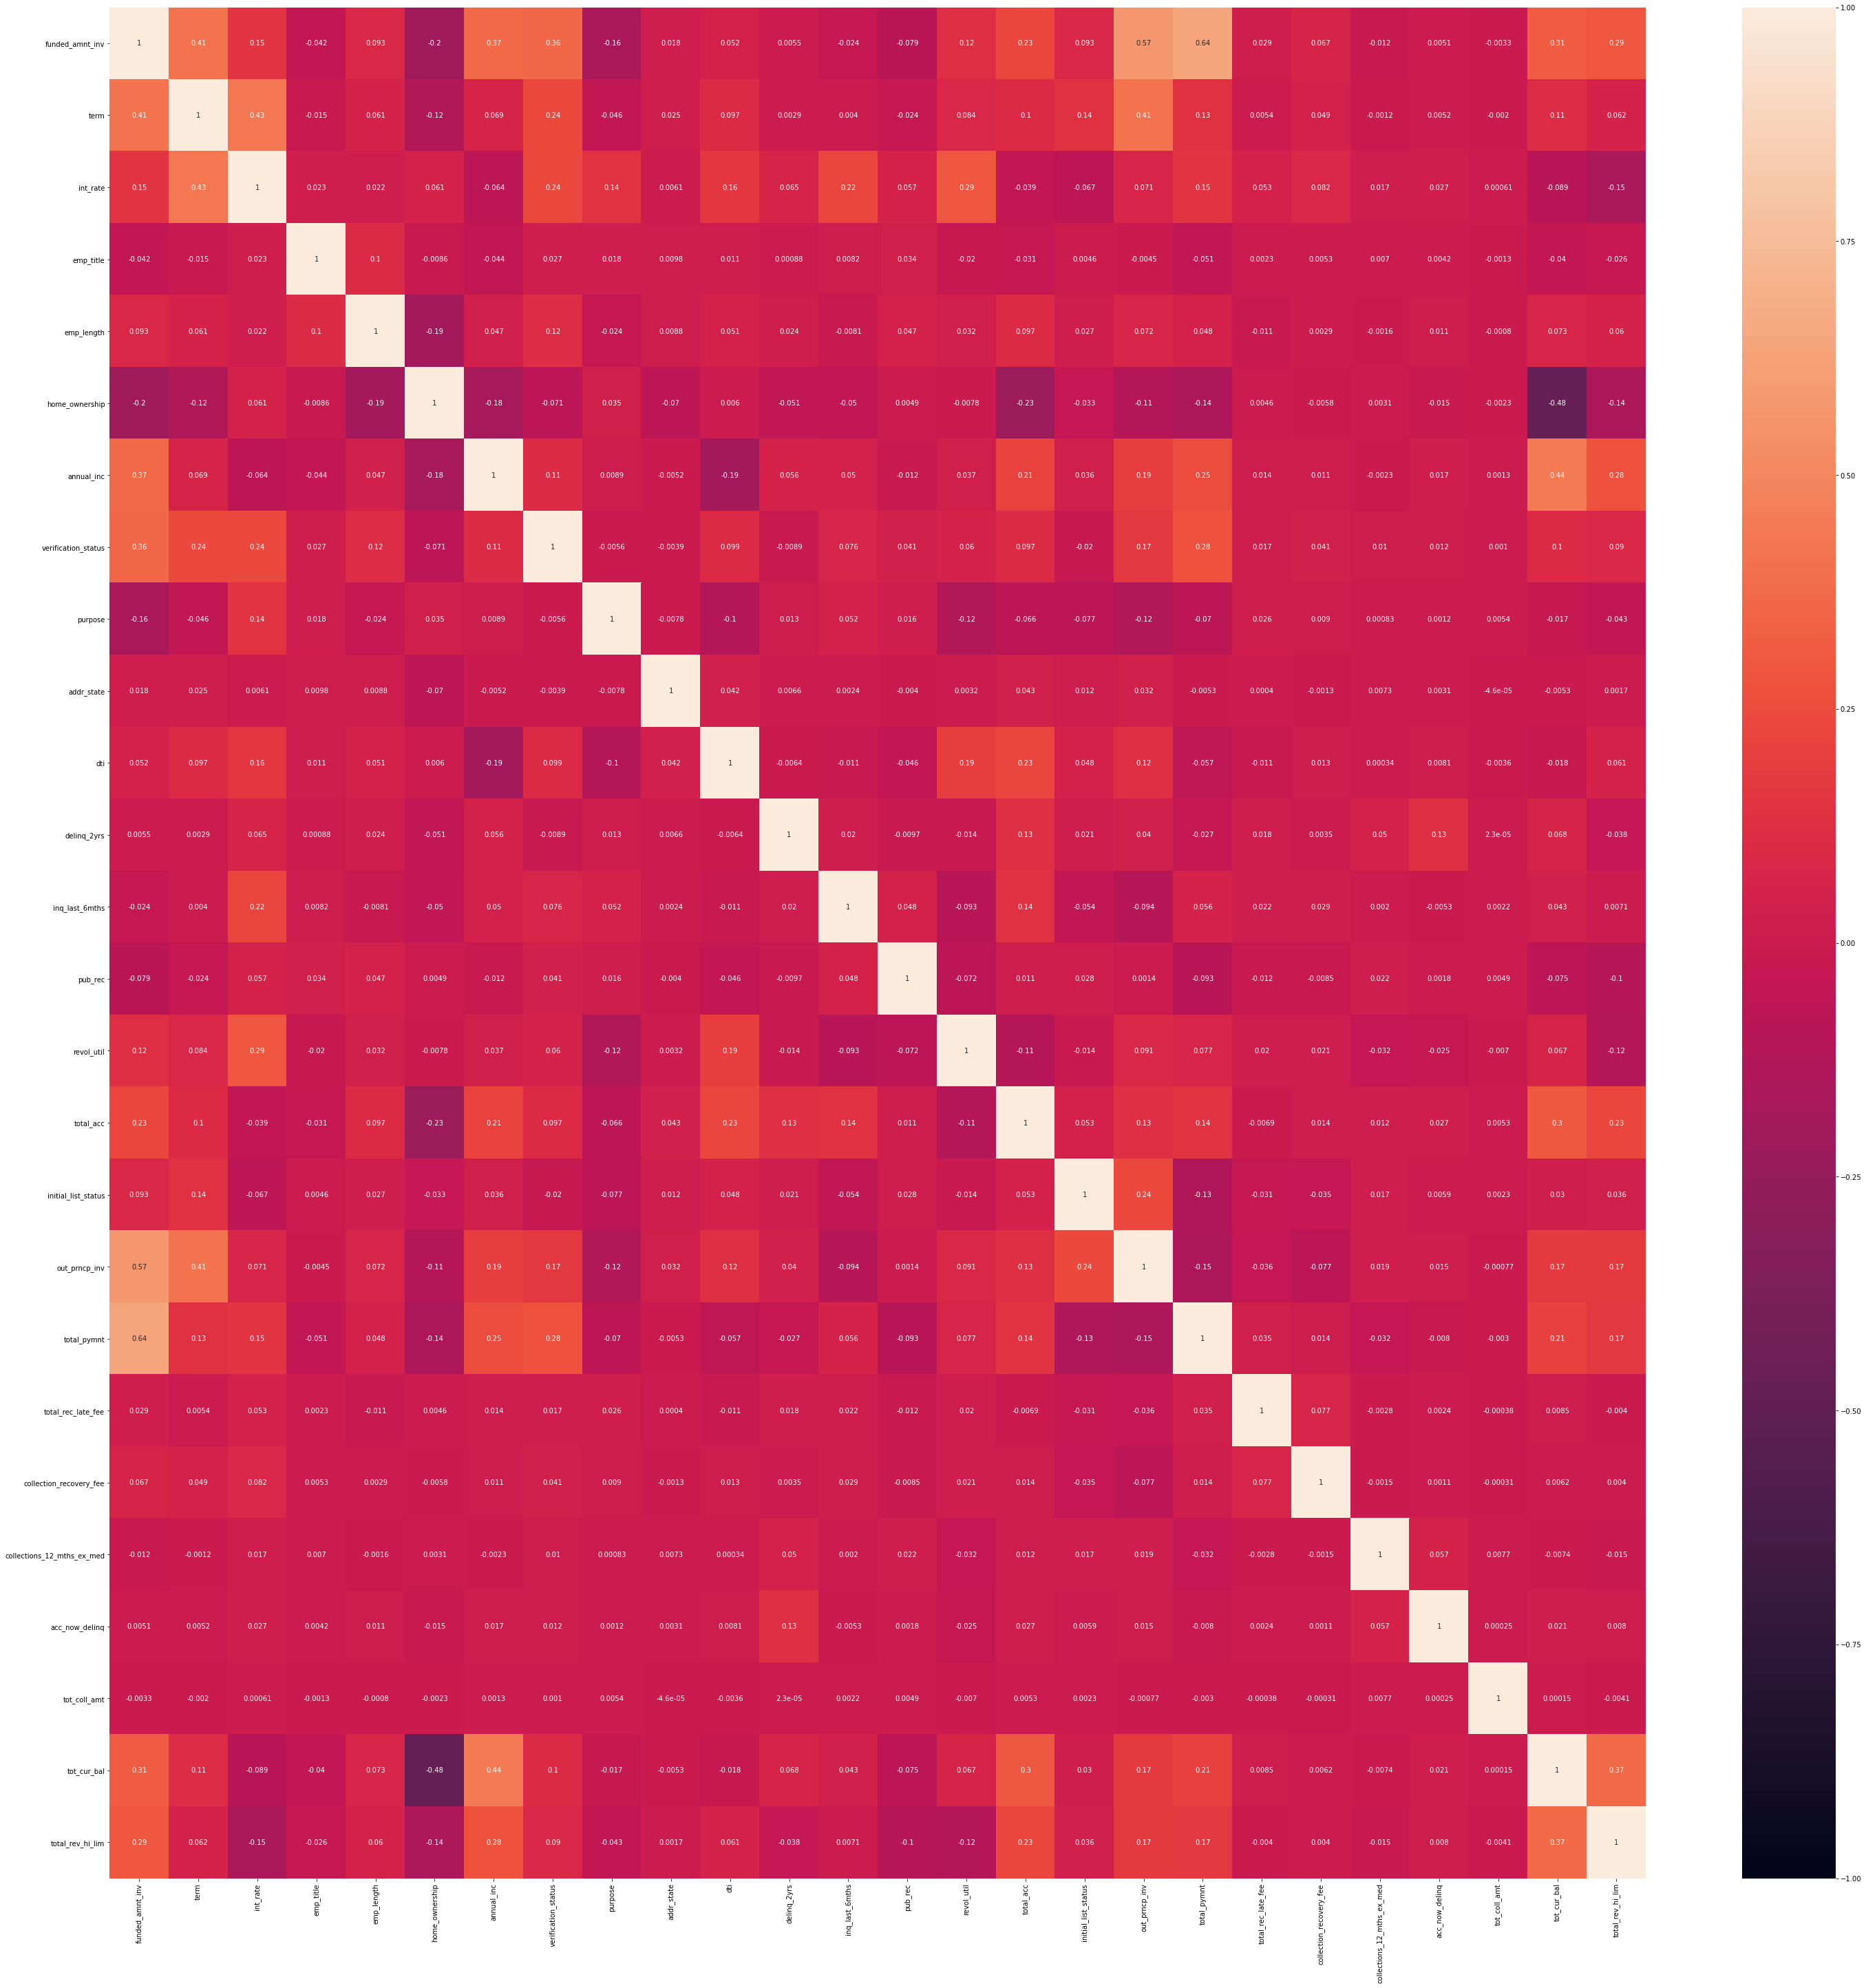

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
X_train_corr=X_train.corr(method="pearson")
plt.figure(figsize = (50,50))
sns.heatmap(X_train_corr, vmin = -1.0, vmax = 1.0, annot = True)


In [30]:
#VIF check the multicolinearity
 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X_train.columns
vif_df["VIF Factor"] = [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,funded_amnt_inv,32.59
1,term,2.24
2,int_rate,16.77
3,emp_title,4.15
4,emp_length,3.93
5,home_ownership,3.78
6,annual_inc,3.98
7,verification_status,3.27
8,purpose,2.42
9,addr_state,3.17


In [31]:
# removing col which has multicolinearity


print(vif_df["VIF Factor"].max())
X_train.drop("funded_amnt_inv",axis=1,inplace=True)
X_test.drop("funded_amnt_inv",axis=1,inplace=True)

32.59382317764893


In [32]:
print(vif_df["VIF Factor"].max())
X_train.drop("int_rate",axis=1,inplace=True)
X_test.drop("int_rate",axis=1,inplace=True)

32.59382317764893


In [33]:
print(vif_df["VIF Factor"].max())
X_train.drop("total_acc",axis=1,inplace=True)
X_test.drop("total_acc",axis=1,inplace=True)


32.59382317764893


In [34]:
print(vif_df["VIF Factor"].max())
X_train.drop("revol_util",axis=1,inplace=True)
X_test.drop("revol_util",axis=1,inplace=True)


32.59382317764893


In [35]:
print(vif_df["VIF Factor"].max())
X_train.drop("dti",axis=1,inplace=True)
X_test.drop("dti",axis=1,inplace=True)


32.59382317764893


In [36]:
vif_df = pd.DataFrame()
vif_df["features"] = X_train.columns
vif_df["VIF Factor"] = [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,term,1.86
1,emp_title,3.90
2,emp_length,3.62
3,home_ownership,2.99
4,annual_inc,3.67
5,verification_status,3.13
6,purpose,2.17
7,addr_state,2.95
8,delinq_2yrs,1.16
9,inq_last_6mths,1.55


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Model on Training Data

In [38]:
from sklearn.linear_model import LogisticRegression
 
# create a model
classifier=LogisticRegression()

#fitting traing data to the model
classifier.fit(X_train,Y_train)

#predic for training data

Y_pred_X_train=classifier.predict(X_train)

In [39]:
# check the eveluation model matrix

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_train,Y_pred_X_train)
print(cfm)

print("classification report: ")
print(classification_report(Y_train,Y_pred_X_train))

acc = accuracy_score(Y_train,Y_pred_X_train)
print("acccurecy of the model: ",acc)

[[551278   1544]
 [ 17857  28299]]
classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    552822
           1       0.95      0.61      0.74     46156

    accuracy                           0.97    598978
   macro avg       0.96      0.81      0.86    598978
weighted avg       0.97      0.97      0.96    598978

acccurecy of the model:  0.9676098287416233


## Logistic Model on Testing Data

In [40]:
# predic for testing data
Y_pred=classifier.predict(X_test)


In [41]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report: ")
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("acccurecy of the model: ",acc)

[[256620     60]
 [   200    111]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.65      0.36      0.46       311

    accuracy                           1.00    256991
   macro avg       0.82      0.68      0.73    256991
weighted avg       1.00      1.00      1.00    256991

acccurecy of the model:  0.9989882914187657


##  Decision Tree Model On Training Data

In [42]:
#predicting using the Decision_Tree_Classifier
 
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)

# fit the model on the data and predict the values

model_DecisionTree.fit(X_train,Y_train)

#predict for testing data 

Y_pred_X_train=model_DecisionTree.predict(X_train)

In [43]:
# check the eveluation model matrix
cfm=confusion_matrix(Y_train,Y_pred_X_train)
print(cfm)

print("classification report: ")
print(classification_report(Y_train,Y_pred_X_train))

acc = accuracy_score(Y_train,Y_pred_X_train)
print("acccurecy of the model: ",acc)

[[552822      0]
 [     0  46156]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978

acccurecy of the model:  1.0


## Decision Tree Model on Testing Data

In [44]:
# predict for testing data
Y_pred=model_DecisionTree.predict(X_test)

In [45]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


[[ 62579 194101]
 [    13    298]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.24      0.39    256680
           1       0.00      0.96      0.00       311

    accuracy                           0.24    256991
   macro avg       0.50      0.60      0.20    256991
weighted avg       1.00      0.24      0.39    256991

Accuracy of the model:  0.2446661556241269


## RANDOM FOREST Model On Training Data

In [46]:
# RANDOM FOREST MODEL    using  Bagging technique
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=10,random_state=10)
# n_estimators=10,...,101 how many bags or DT model built in the memory background
#n_estimators= frandom values
# prunning can be aslo done here also

#fit the model on the data and predict the value

model_RandomForest = model_RandomForest.fit(X_train,Y_train)

In [47]:
# predict on training data
Y_pred_X_train=model_RandomForest.predict(X_train)

In [48]:
# check the eveluation model matrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


cfm=confusion_matrix(Y_train,Y_pred_X_train)
print(cfm)

print("classification report: ")
print(classification_report(Y_train,Y_pred_X_train))

acc = accuracy_score(Y_train,Y_pred_X_train)
print("acccurecy of the model: ",acc)

[[552781     41]
 [  2025  44131]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.96      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978

acccurecy of the model:  0.9965507915148804


## RANDOM FOREST Model On Testing  Data

In [49]:
# predic for test data
Y_pred=model_RandomForest.predict(X_test)

In [50]:

# check the eveluation model matrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))

[[232824  23856]
 [    58    253]]
0.906946157647544
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    256680
           1       0.01      0.81      0.02       311

    accuracy                           0.91    256991
   macro avg       0.51      0.86      0.49    256991
weighted avg       1.00      0.91      0.95    256991



In [51]:
data1=pd.read_table(r"D:\Imarticus Presentation\XYZCorp_LendingData.txt")
data1.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [52]:
data1['issue_d'] = pd.to_datetime(data1['issue_d'])

In [53]:
data1["issue_d"].dtypes

dtype('<M8[ns]')

In [54]:
subfile  = data1[(data1['issue_d'] >= '2015-06-01') & (data1['issue_d'] <= '2015-12-01')]

In [55]:
print(X_test.shape)
print(subfile.shape)

(256991, 21)
(256991, 73)


In [56]:
Y_pred=pd.DataFrame(Y_pred)
Y_pred["prediction"]=Y_pred.iloc[:,-1]

In [57]:
subfile=subfile.reset_index()

In [58]:
sub_file=pd.concat([subfile,Y_pred.iloc[:,-1]],axis=1)

In [59]:
sub_file=sub_file[["id","member_id","annual_inc_joint","application_type","grade","home_ownership","verification_status","annual_inc","default_ind","prediction"]]

In [60]:
import numpy as np

([<matplotlib.patches.Wedge at 0x199eb0e6e08>,
 [Text(1.339636492003118, 0.40666210702938627, 'Successful Payers'),
  Text(-1.0525715518677508, -0.31952015304001563, 'Defaulters')],
 [Text(0.86119488771629, 0.2614256402331769, '9.4%'),
  Text(-0.5741299373824095, -0.1742837198400085, '90.6%')])

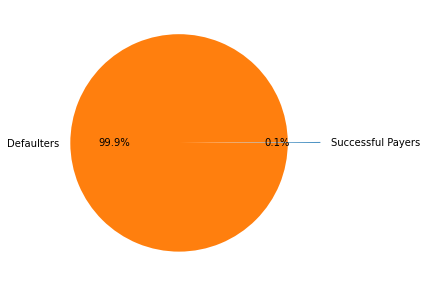

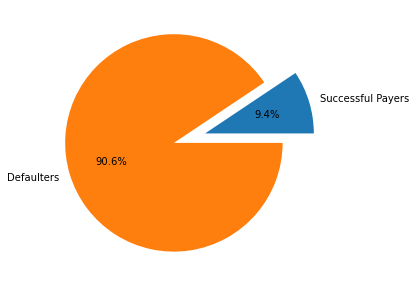

In [61]:
X=["Successful Payers","Defaulters"]
default_ind=[311,256680]
prediction=[24109,232882]
explode = [0.3,0]

fig1 = plt.figure(figsize=(5,5))
plt.pie(default_ind, explode=explode, labels=X,autopct='%1.1f%%')

fig2 = plt.figure(figsize=(5,5))
plt.pie(prediction, explode=explode, labels=X,autopct='%1.1f%%')
# plt.pie(prediction,labels=X)

In [62]:
sub_file.head()

,id,member_id,annual_inc_joint,application_type,grade,home_ownership,verification_status,annual_inc,default_ind,prediction
0,68587652,73477494,NaN,INDIVIDUAL,A,MORTGAGE,Not Verified,150000.0,0,0
1,66624733,71350547,NaN,INDIVIDUAL,E,RENT,Not Verified,150000.0,0,1
2,68446769,73336592,NaN,INDIVIDUAL,A,MORTGAGE,Not Verified,59000.0,0,0
3,68595206,73484978,NaN,INDIVIDUAL,D,MORTGAGE,Not Verified,180000.0,0,0
4,68587491,73477331,NaN,INDIVIDUAL,A,MORTGAGE,Not Verified,93000.0,0,0


In [63]:
sub_file["prediction"].value_counts()

0    232882
1     24109
Name: prediction, dtype: int64

In [64]:
sub_file["default_ind"].value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

In [65]:
sub_file["prediction"] = sub_file["prediction"].map({0 :"Defaulters",1:"Successful payers"})

In [66]:
sub_file.head()

,id,member_id,annual_inc_joint,application_type,grade,home_ownership,verification_status,annual_inc,default_ind,prediction
0,68587652,73477494,NaN,INDIVIDUAL,A,MORTGAGE,Not Verified,150000.0,0,Defaulters
1,66624733,71350547,NaN,INDIVIDUAL,E,RENT,Not Verified,150000.0,0,Successful payers
2,68446769,73336592,NaN,INDIVIDUAL,A,MORTGAGE,Not Verified,59000.0,0,Defaulters
3,68595206,73484978,NaN,INDIVIDUAL,D,MORTGAGE,Not Verified,180000.0,0,Defaulters
4,68587491,73477331,NaN,INDIVIDUAL,A,MORTGAGE,Not Verified,93000.0,0,Defaulters


In [67]:
sub_file = sub_file.replace(to_replace ="Source Verified", value ="Verified")

In [68]:
sub_file["verification_status"].value_counts()

Verified        183815
Not Verified     73176
Name: verification_status, dtype: int64

In [69]:
#sub_file.to_excel(r"G:\IMARTICUS FINAL PROJECT\Capstone_Project_File.xlsx")

FileCreateError: [Errno 2] No such file or directory: 'G:\\IMARTICUS FINAL PROJECT\\Capstone_Project_File.xlsx'

Text(0.5, 1.0, 'grade')

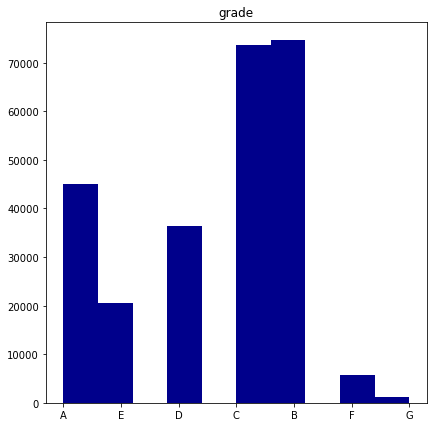

In [70]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hist(x="grade",data=sub_file,bins=10,color="darkblue")
plt.title("grade")

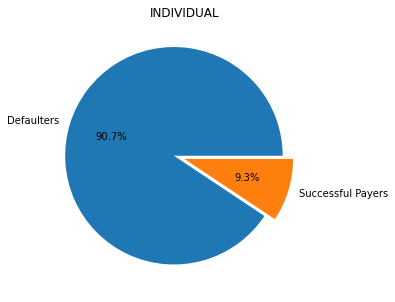

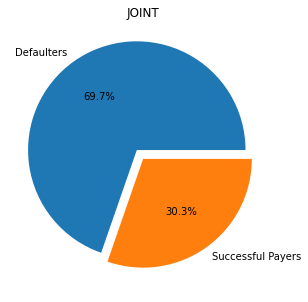

In [74]:
import matplotlib.pyplot as plt

X=["Defaulters","Successful Payers"]
INDIVIDUAL = [232574,23975]
JOINT = [308,134]
explode = [0.1,0]

fig1 = plt.figure(figsize=(5,5))
plt.pie(INDIVIDUAL, explode=explode, labels=X,autopct='%1.1f%%')
plt.title("INDIVIDUAL")
plt.show()

fig2 = plt.figure(figsize=(5,5))
plt.pie(JOINT, explode=explode, labels=X,autopct='%1.1f%%')
plt.title("JOINT")
plt.show()

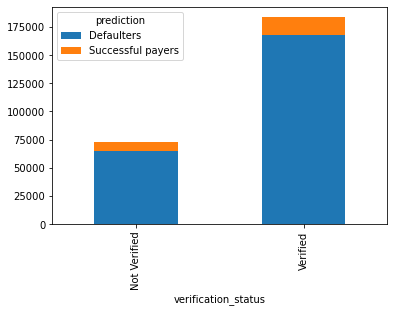

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

sub_file.groupby(['verification_status','prediction']).size().unstack().plot(kind='bar',stacked=True)
plt.show()